In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=1.5)

DATA_DIR = Path('../data')

## Load Data

In [40]:
df = pd.read_pickle('siju-dataframe.pkl')

original_shape = df.shape
print(f'Dataframe shape: {original_shape}')

df.head()

Dataframe shape: (5910, 22)


,experiment_id,stimulus,valence,dorsal_to_ventral,hours_starved,order_presented,virgin,lobe,adaptation,pre_std,...,response_std,fly_id,fly_day_id,mated_single,df_mean,df_f,ΔF/F,pre_ΔF/F,greek_lobe,hours starved
0,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a1,0.007500,0.030948,...,0.181160,2016-08-09 00:00:000,0,NaN,0.341723,0.341723,0.341723,0.021723,α1,0
1,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a2,-0.010356,0.020711,...,0.157602,2016-08-09 00:00:000,0,NaN,0.230774,0.230774,0.230774,0.017802,α2,0
2,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,a3,-0.027494,0.026490,...,0.343259,2016-08-09 00:00:000,0,NaN,1.023435,1.023435,1.023435,0.020086,α3,0
3,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap1,0.026010,0.041217,...,0.258084,2016-08-09 00:00:000,0,NaN,0.476658,0.476658,0.476658,0.028166,α'1,0
4,TH-58E02_090816_Citronella,Citronella,-1,True,0,0,False,ap2,0.000798,0.041212,...,0.268255,2016-08-09 00:00:000,0,NaN,0.412485,0.412485,0.412485,0.034686,α'2,0


## Clean Data

### 1. Remove the stimuli which are not found in the Hije data

In [41]:
print(f'Siju stimuli: {df.stimulus.unique()}')

# Stimuli not used in the Hije data
uncommon_stimuli = ['high_Vinegar', 'cVA', 'Isoamylacetate', 'Geosmin']
df = df[~df["stimulus"].isin(uncommon_stimuli)]

print(f'Common stimuli: {df.stimulus.unique()}')

df.shape

Siju stimuli: ['Citronella' 'Vinegar' 'Yeast' 'Peppermint' '2-Heptanone' '1-Hexanol'
 'cVA' 'Geosmin' '4MCH' 'Isoamylacetate' '3Octanol' 'Ethanol'
 'high_Vinegar']
Common stimuli: ['Citronella' 'Vinegar' 'Yeast' 'Peppermint' '2-Heptanone' '1-Hexanol'
 '4MCH' '3Octanol' 'Ethanol']


(3810, 22)

### 2. Remove any starved flies

In [53]:
df = df[df['hours_starved'] == 0]
print(df.shape)

(1365, 22)


### 3. Remove irrelevent columns

In [52]:
df_minimal = df[['stimulus', 'greek_lobe', 'ΔF/F']]
df_minimal.columns = ['stimulus', 'lobe', 'DAN dF/F']

print(f'Final shape {df_minimal.shape}')

df_minimal.head(10)

Final shape (1365, 3)


,stimulus,lobe,DAN dF/F
0,Citronella,α1,0.341723
1,Citronella,α2,0.230774
2,Citronella,α3,1.023435
3,Citronella,α'1,0.476658
4,Citronella,α'2,0.412485
5,Citronella,α'3,0.226218
6,Citronella,β1,0.624777
7,Citronella,β2,0.990563
8,Citronella,β'1,0.586997
9,Citronella,β'2,0.837626


### Explore the final dataset

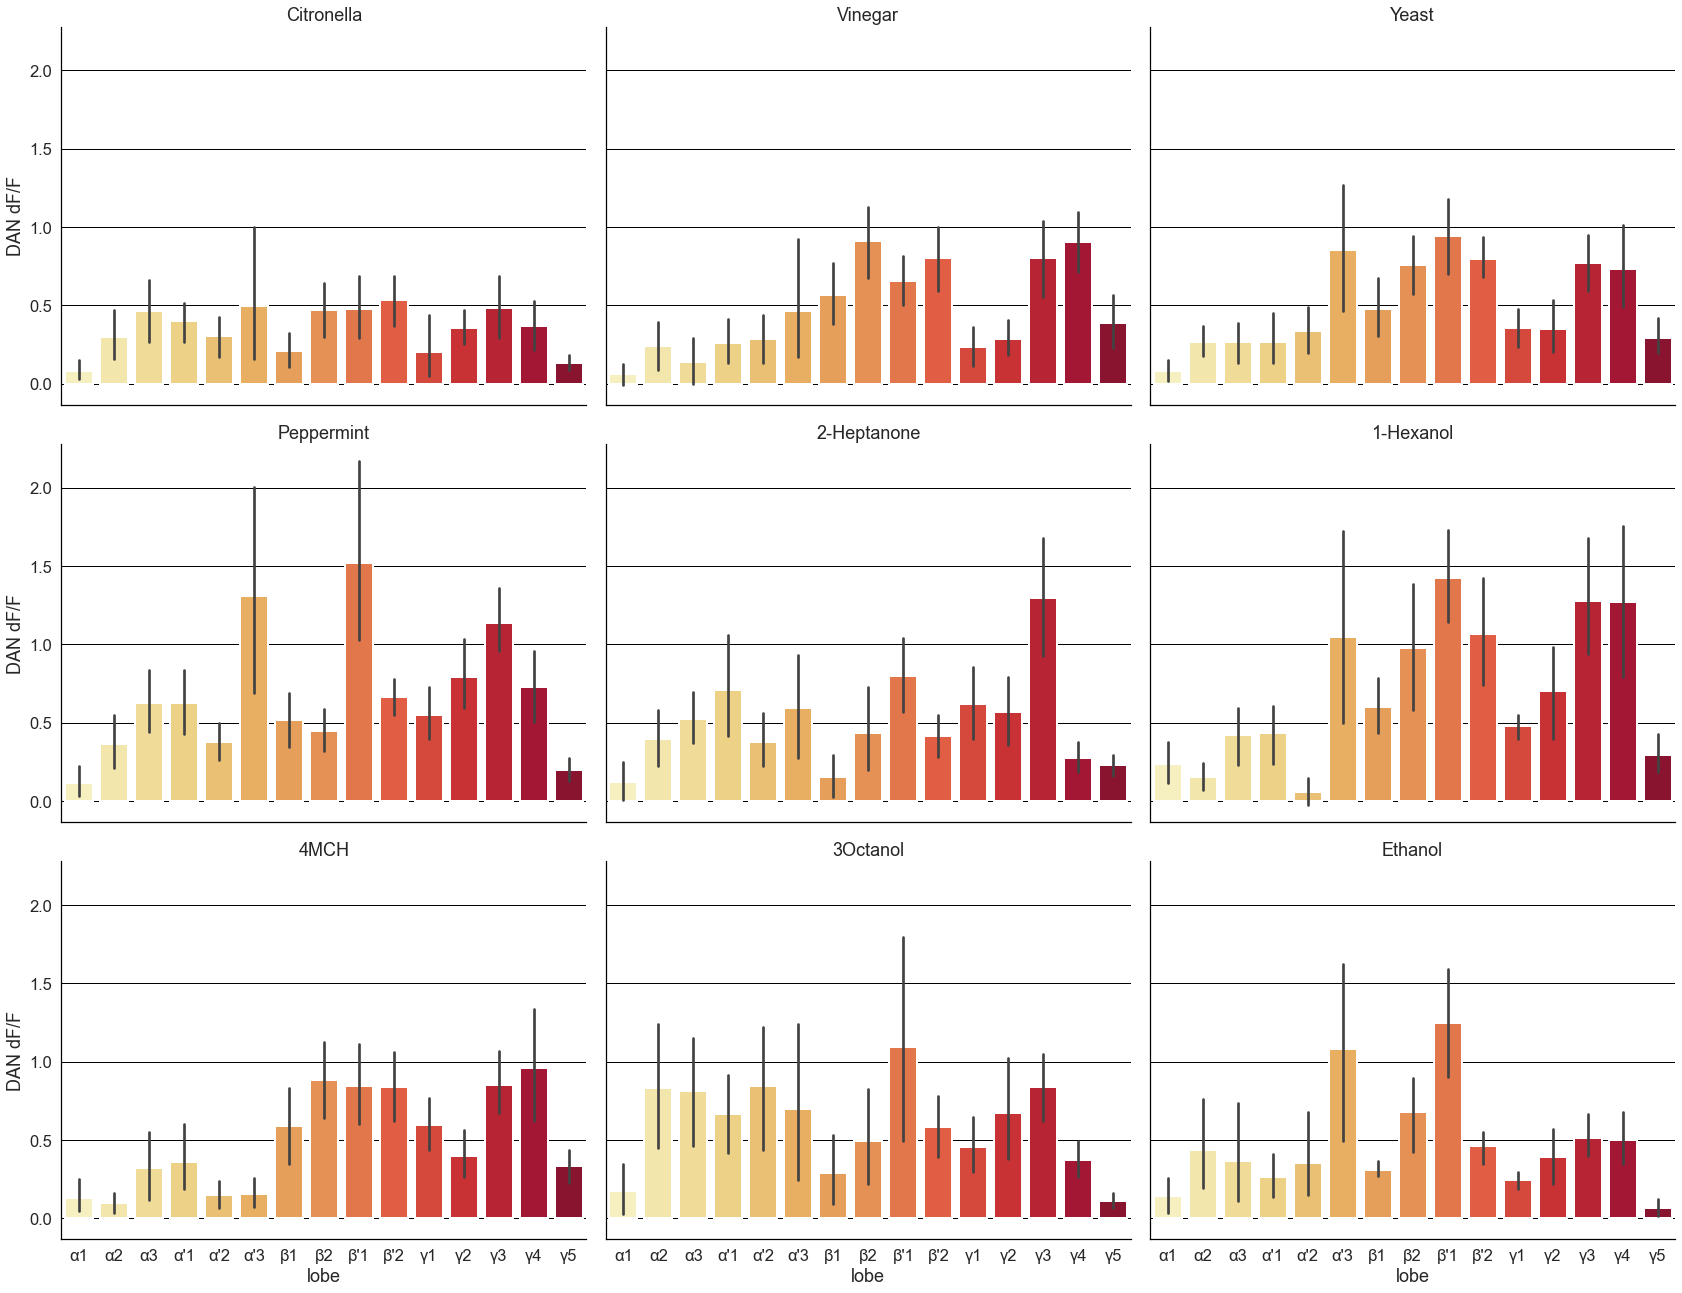

In [59]:
b = sns.catplot(
    x="lobe", 
    y="DAN dF/F", 
    col="stimulus", 
    col_wrap=3, 
    data=df_minimal, 
    linewidth=2, 
    kind="bar",
    palette='YlOrRd',
    height=6, 
    aspect=1.3
)
b.set_titles("{col_name}") 

In [75]:
description = df_minimal.groupby(['stimulus', 'lobe']).describe()
description.head(20)

DAN dF/F                                                    \
                    count      mean       std       min       25%       50%   
stimulus    lobe                                                              
1-Hexanol   α'1       8.0  0.432535  0.295953 -0.065685  0.329028  0.447560   
            α'2       8.0  0.060010  0.138788 -0.142618 -0.022552  0.050003   
            α'3       8.0  1.047047  1.006725  0.084156  0.447967  0.656651   
            α1        8.0  0.237846  0.203406  0.016558  0.101950  0.174284   
            α2        8.0  0.150805  0.132932 -0.004159  0.077449  0.110407   
            α3        8.0  0.419109  0.285916 -0.047834  0.212802  0.481722   
            β'1       8.0  1.424355  0.468019  0.776379  1.249545  1.386894   
            β'2       8.0  1.063830  0.510704  0.453682  0.592557  1.069327   
            β1        8.0  0.601346  0.288164  0.249101  0.432963  0.502472   
            β2        8.0  0.976017  0.635970  0.246948  0.335735  1.042505   
            γ1        8.0  0.476267  0.116825  0.285408  0.408466  0.506937   
            γ2        8.0  0.700662  0.444821 -0.037708  0.421827  0.715467   
            γ3        8.0  1.273928  0.569758  0.666890  0.924858  1.139054   
            γ4        8.0  1.272242  0.737400  0.476132  0.626636  1.096913   
            γ5        8.0  0.292688  0.193645  0.115164  0.178682  0.239121   
2-Heptanone α'1       9.0  0.707905  0.546897  0.170889  0.340021  0.593611   
            α'2       9.0  0.374887  0.282783  0.080005  0.147566  0.308077   
            α'3       9.0  0.592451  0.544467 -0.018796  0.145283  0.510481   
            α1        9.0  0.123494  0.204274 -0.103485 -0.041779  0.101178   
            α2        9.0  0.393083  0.295746  0.130731  0.150289  0.303822   

                                      
                       75%       max  
stimulus    lobe                      
1-Hexanol   α'1   0.609375  0.834951  
            α'2   0.173087  0.231038  
            α'3   1.320804  3.207139  
            α1    0.334364  0.599646  
            α2    0.214529  0.422269  
            α3    0.583899  0.773601  
            β'1   1.517711  2.345692  
            β'2   1.370126  1.791662  
            β1    0.743304  1.068013  
            β2    1.381639  1.930191  
            γ1    0.547588  0.624003  
            γ2    0.936620  1.338793  
            γ3    1.458101  2.344661  
            γ4    1.857650  2.298872  
            γ5    0.335761  0.730222  
2-Heptanone α'1   0.924371  1.922710  
            α'2   0.467100  0.979198  
            α'3   0.939318  1.635195  
            α1    0.277777  0.491867  
            α2    0.555164  0.965647

In [89]:
number_trials_per_stimulus = df_minimal['stimulus'].value_counts()/15
number_trials_per_stimulus = number_trials_per_stimulus.to_frame()
number_trials_per_stimulus.columns = ['experiment count']
number_trials_per_stimulus

,experiment count
Yeast,15.0
Peppermint,12.0
Vinegar,11.0
4MCH,11.0
Citronella,11.0
2-Heptanone,9.0
1-Hexanol,8.0
3Octanol,8.0
Ethanol,6.0


### Average the activity

In [100]:
processed_data = df_minimal.groupby(['stimulus', 'lobe']).mean()
processed_data = processed_data.reset_index()

processed_data

,stimulus,lobe,DAN dF/F
0,1-Hexanol,α'1,0.432535
1,1-Hexanol,α'2,0.060010
2,1-Hexanol,α'3,1.047047
3,1-Hexanol,α1,0.237846
4,1-Hexanol,α2,0.150805
...,...,...,...
130,Yeast,γ1,0.355500
131,Yeast,γ2,0.347989
132,Yeast,γ3,0.767487
133,Yeast,γ4,0.731888


### Save data

In [101]:
processed_data.to_pickle(DATA_DIR / 'siju-cleaned.pkl')